# PPMtools: Diffusion analysis

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/user/andrassy/PyPPM')
from ppmpy import ppm
from matplotlib import pyplot as plt
%matplotlib nbagg
from nugridpy import utils
cb = utils.colourblind

In [2]:
yprof_paths = {'D25':'/data/ppm_rpod2/YProfiles/O-shell-M25/D25/', \
               'E10':'/data/ppm_rpod2/YProfiles/RAWD/E10/', \
               'J6':'/data/ppm_rpod2/YProfiles/O-shell-mixing/J6/'}
yprofs = {rid:ppm.yprofile(path) for rid, path in yprof_paths.items()}

rprof_paths = {'M12':'/user/niagara_projects/PPM2.0/M_H-core-M25/M12-Hcore25-1536-1000x/prfs/'}
rp_sets = {rid:ppm.RprofSet(path) for rid, path in rprof_paths.items()}

run_data = {**yprofs, **rp_sets}
res = {}

Reading attributes from file  YProfile-01-0237.bobaaa
There are 238 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-mixing/J6/ directory.
Ndump values range from 0 to 237
Time values range from 10.0 to 2380.0
Reading attributes from file  YProfile-01-0426.bobaaa
There are 427 YProfile files in the /data/ppm_rpod2/YProfiles/RAWD/E10/ directory.
Ndump values range from 0 to 426
Time values range from 106.86 to 23028.4
Reading attributes from file  YProfile-01-0179.bobaaa
There are 180 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D25/ directory.
Ndump values range from 0 to 179
Time values range from 10.0 to 1800.0
492 rprof files found in '/user/niagara_projects/PPM2.0/M_H-core-M25/M12-Hcore25-1536-1000x/prfs/.
Dump numbers range from 0 to 491.
Reading history file '/user/niagara_projects/PPM2.0/M_H-core-M25/M12-Hcore25-1536-1000x/prfs/Hcore001536-0000.hstry'.


## Runs without nuclear burning

### D25

This is an almost ideal case. The lighter fluid is transported from the convective boundary into the convection zone and its mass is almost perfectly conserved in the process. This can be seen in the first plot below, in which the diffusive flux first sharply increases and then gradually decreases to a value close to zero as we go from the convective boundary on the right to the core on the left.

<IPython.core.display.Javascript object>


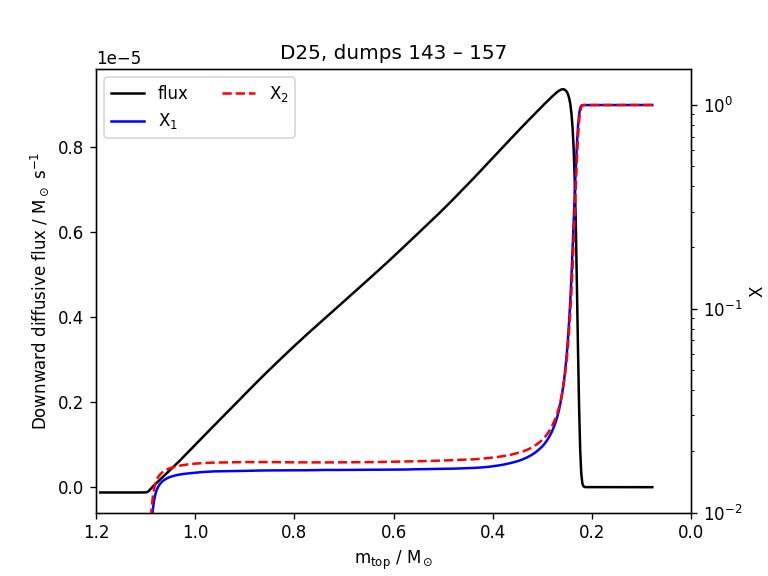

<IPython.core.display.Javascript object>


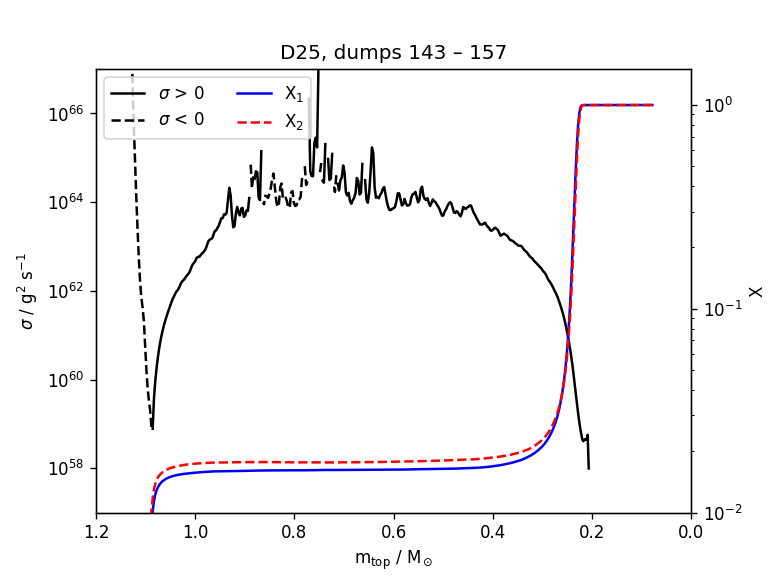

<IPython.core.display.Javascript object>


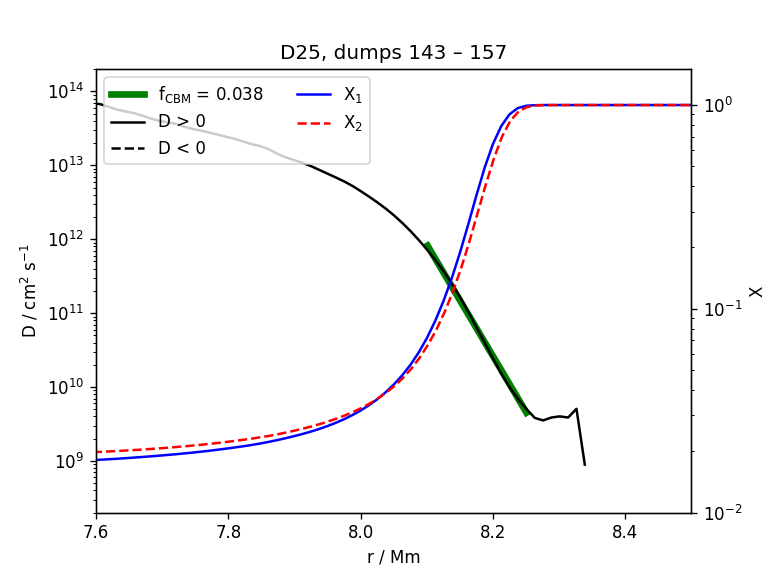

In [3]:
run_id = 'D25'

# Required arguments
# cycles1: cycles (dumps) to be averaged to get the start point
# cycles2: cycles (dumps) to be averaged to get the end point
d0 = 150
d1 = d0 - 7
d2 = d0 + 7
delta_d = 0
cycles1 = range(d1 - delta_d, d1 + delta_d + 1)
cycles2 = range(d2 - delta_d, d2 + delta_d + 1)

# Optional arguments
ifig0 = 1
data_rlim = (3.5, 9.2)
show_plots = True
logmt = False
mtlim = (1.2, 0.)
rlim = (7.6, 8.5)
plot_var = True
logvar = True
varlim = (1e-2, 1.5e0)
sigmalim = (1e57, 1e67)
Dlim = (2e8, 2e14)
fit_rlim = (8.1, 8.25)

res[run_id] = run_data[run_id].DsolveLgr(cycles1, cycles2, \
              data_rlim=data_rlim, show_plots=show_plots, ifig0=ifig0, \
              run_id=run_id, logmt=logmt, mtlim=mtlim, rlim=rlim, \
              plot_var=plot_var, logvar=logvar, varlim=varlim, \
              sigmalim=sigmalim, Dlim=Dlim, fit_rlim=fit_rlim)

### M12

This is a less-than-ideal case, in which the total mass of the lighter fluid slightly decreases with time despite the absence of nuclear burning. The downward diffusive flux therefore does not reach zero at the bottom of the convection zone and this error propagates into the diffusion coefficient.

Dump 0 at t = 0.00 min is the closest to t = 0.00 min.
Dump 0 at t = 0.00 min is the closest to t = 0.00 min.
Dump 0 at t = 0.00 min is the closest to t = 0.00 min.
Dump 0 at t = 0.00 min is the closest to t = 0.00 min.
Dump 0 at t = 0.00 min is the closest to t = 0.00 min.
Dump 0 at t = 0.00 min is the closest to t = 0.00 min.


<IPython.core.display.Javascript object>


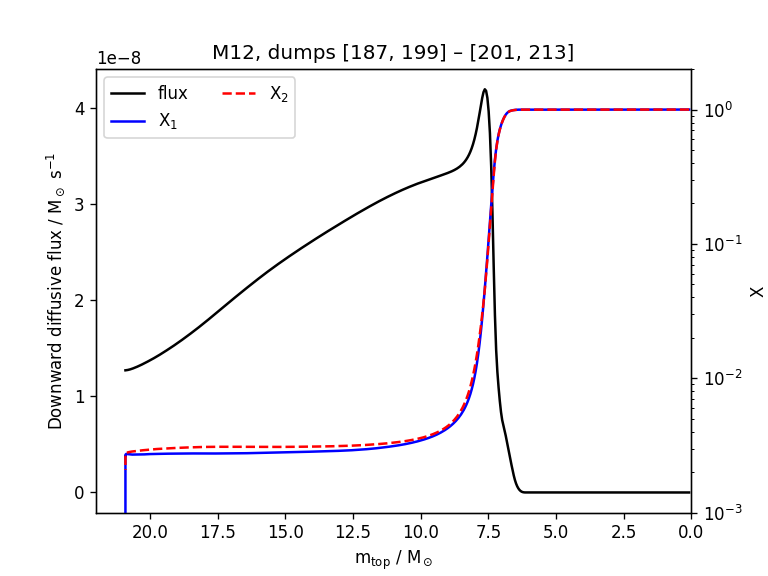

<IPython.core.display.Javascript object>


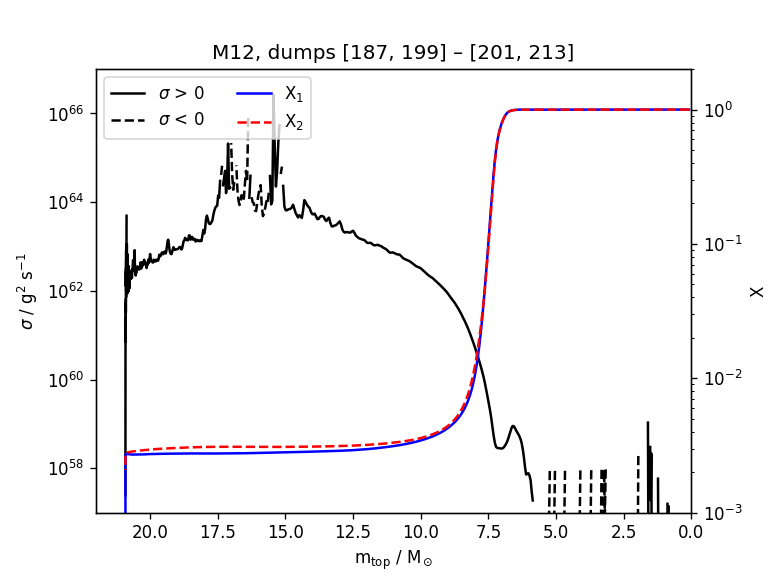

<IPython.core.display.Javascript object>


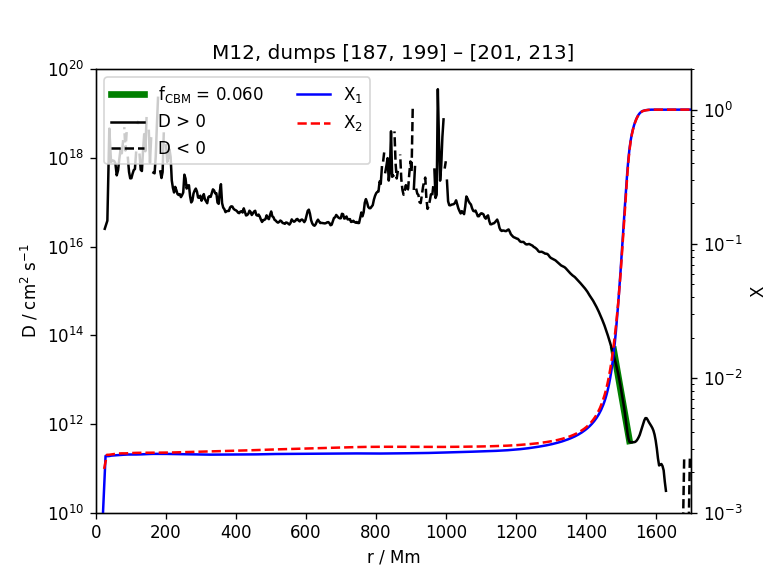

In [4]:
run_id = 'M12'

# Required arguments
# cycles1: cycles (dumps) to be averaged to get the start point
# cycles2: cycles (dumps) to be averaged to get the end point
d0 = 200
d1 = d0 - 7
d2 = d0 + 7
delta_d = 6
cycles1 = range(d1 - delta_d, d1 + delta_d + 1)
cycles2 = range(d2 - delta_d, d2 + delta_d + 1)

# Optional arguments
ifig0 = 4
data_rlim = (30., 2460.)
show_plots = True
logmt = False
mtlim = (22., 0.)
rlim = (0., 1700.)
plot_var = True
logvar = True
varlim = (1e-3, 2e0)
sigmalim = (1e57, 1e67)
Dlim = (1e10, 1e20)
fit_rlim = (1480., 1524.)

res[run_id] = run_data[run_id].DsolveLgr(cycles1, cycles2, \
              data_rlim=data_rlim, show_plots=show_plots, ifig0=ifig0, \
              run_id=run_id, logmt=logmt, mtlim=mtlim, rlim=rlim, \
              plot_var=plot_var, logvar=logvar, varlim=varlim, \
              sigmalim=sigmalim, Dlim=Dlim, fit_rlim=fit_rlim)

### J6

The fractional volume variable was used as a passive tracer in this run, initialised to have a sinusoidal profile. Both fluids have the same mean molecular weight.

<IPython.core.display.Javascript object>


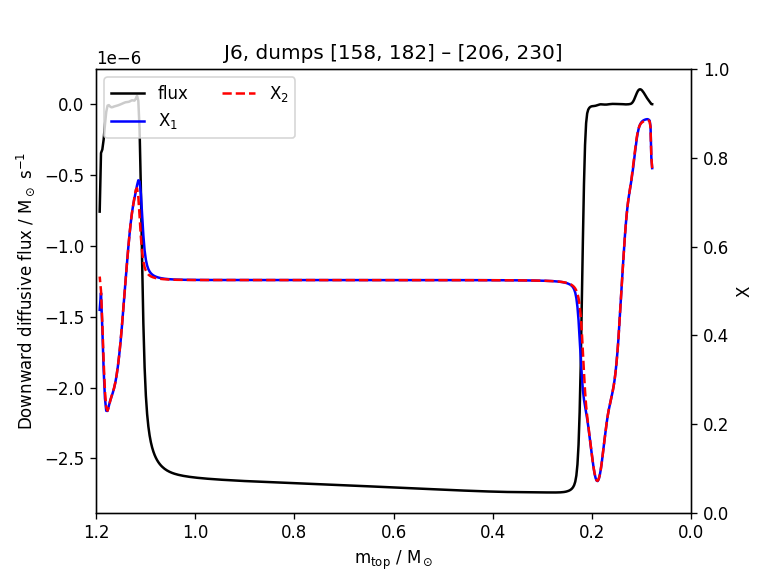

<IPython.core.display.Javascript object>


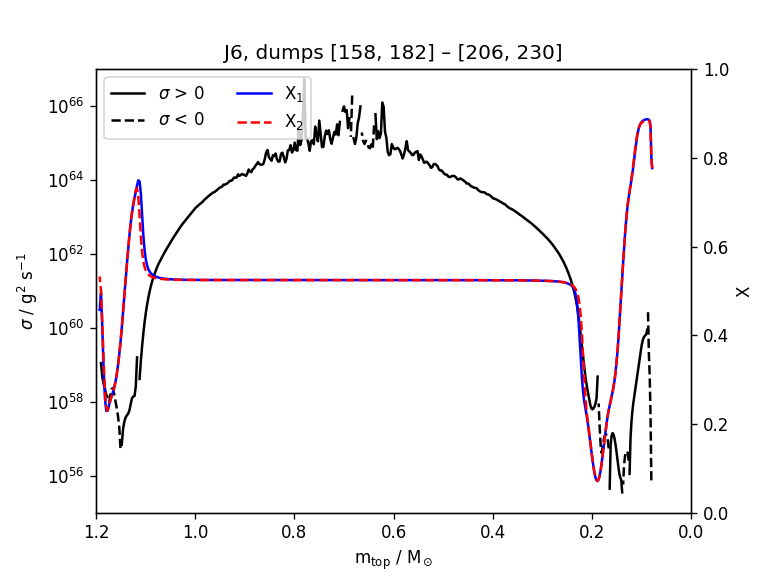

<IPython.core.display.Javascript object>


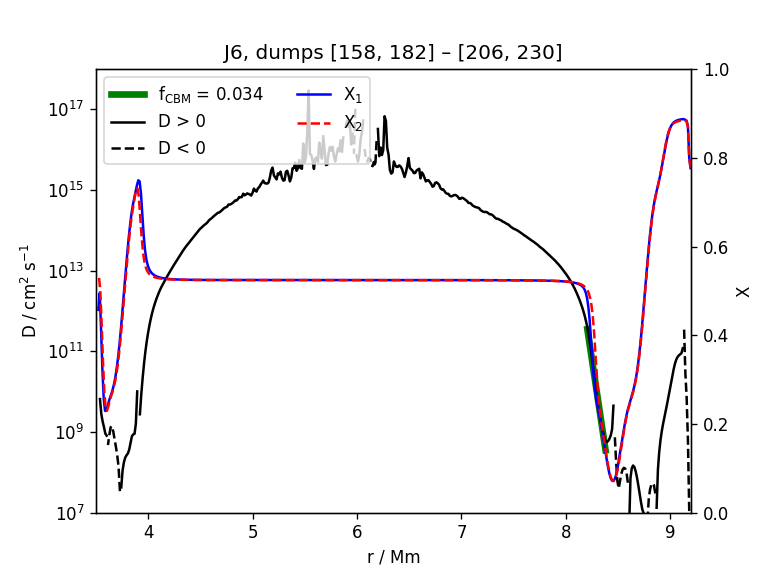

In [5]:
run_id = 'J6'

# Required arguments
# cycles1: cycles (dumps) to be averaged to get the start point
# cycles2: cycles (dumps) to be averaged to get the end point
d0 = 194
d1 = d0 - 24
d2 = d0 + 24
delta_d = 12
cycles1 = range(d1 - delta_d, d1 + delta_d + 1)
cycles2 = range(d2 - delta_d, d2 + delta_d + 1)

# Optional arguments
ifig0 = 7
data_rlim = (3.5, 9.2)
show_plots = True
logmt = False
mtlim = (1.2, 0.)
rlim = (3.5, 9.2)
plot_var = True
logvar = False
varlim = (0., 1.)
sigmalim = (1e55, 1e67)
Dlim = (1e7, 1e18)
fit_rlim = (8.20, 8.38)

res[run_id] = run_data[run_id].DsolveLgr(cycles1, cycles2, \
              data_rlim=data_rlim, show_plots=show_plots, ifig0=ifig0, \
              run_id=run_id, logmt=logmt, mtlim=mtlim, rlim=rlim, \
              plot_var=plot_var, logvar=logvar, varlim=varlim, \
              sigmalim=sigmalim, Dlim=Dlim, fit_rlim=fit_rlim)

## Runs with nuclear burning

### E10

This run includes nuclear burning via the C12pg reaction. A source term has to be added to the diffusion equation to account for the burning.

Source term correction factor:  0.917336533529


<IPython.core.display.Javascript object>


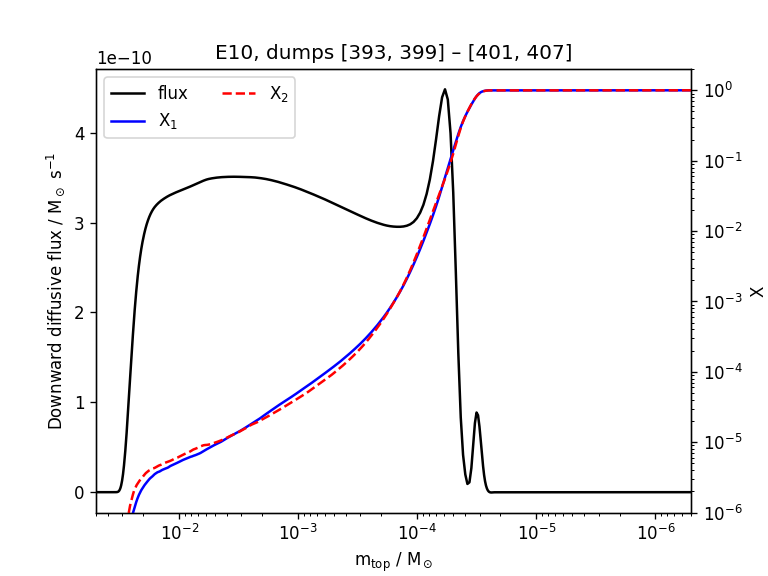

<IPython.core.display.Javascript object>


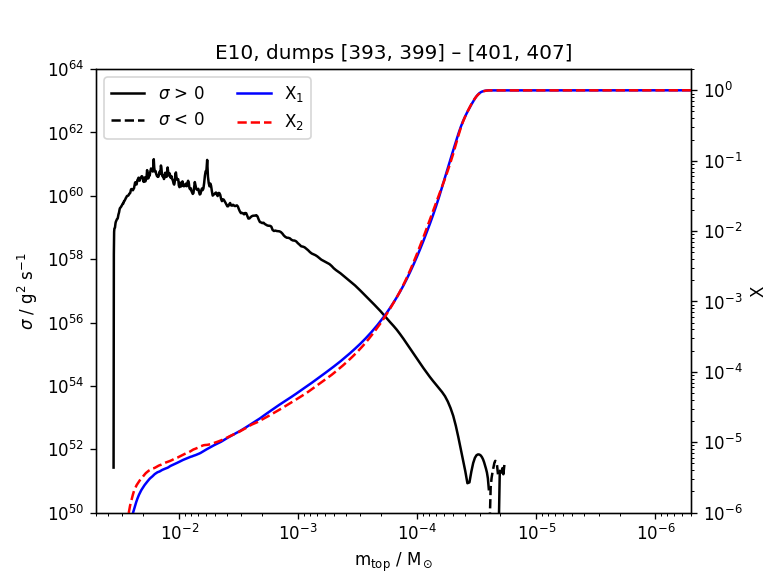

<IPython.core.display.Javascript object>


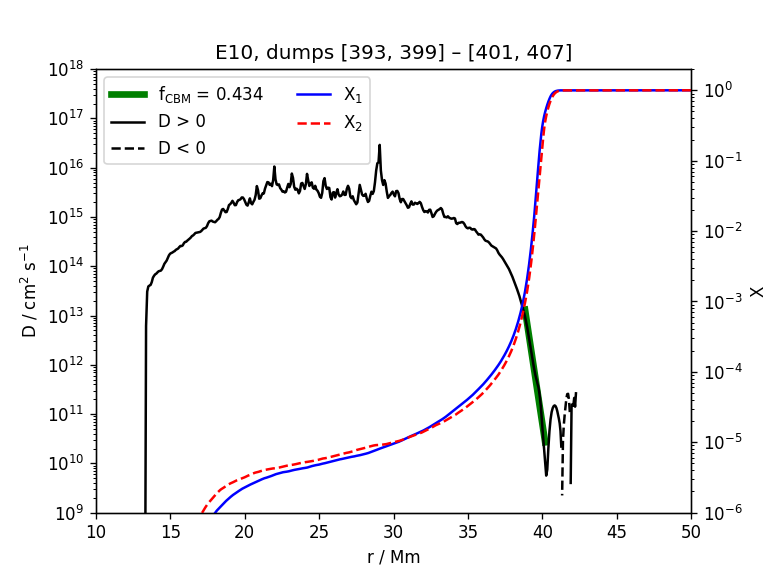

In [6]:
run_id = 'E10'

# Required arguments
# cycles1: cycles (dumps) to be averaged to get the start point
# cycles2: cycles (dumps) to be averaged to get the end point
d0 = 400
d1 = d0 - 4
d2 = d0 + 4
delta_d = 3
cycles1 = range(d1 - delta_d, d1 + delta_d + 1)
cycles2 = range(d2 - delta_d, d2 + delta_d + 1)

# Source function that accounts for the destruction of the lighter
# fluid in the burning process.
src_func = run_data[run_id].compute_Xdot_C12pg
T9corr_params = {'kind':1, 'params':{'a':0.6, 'b':0.85}}
src_args = {'T9corr_params':T9corr_params, \
            'airmu':1.4, \
            'cldmu':0.3, \
            'fkair':0.203606102635, \
            'fkcld':0.885906040268, \
            'atomicnoair':6.65742024965, \
            'atomicnocld':1.34228187919}
# src_correction multiplies the source term by a factor that makes
# sure that the source term exactly accounts for all the mass lost.
# The correction factor should be close to unity, but it will not
# be exactly unity, because we only sample the burning rate at a
# few points in time.
src_correction = True

# Optional arguments
ifig0 = 10
data_rlim = (6., 50.)
show_plots = True
logmt = True
mtlim = (5e-2, 5e-7)
rlim = (10., 50.)
plot_var = True
logvar = True
varlim = (1e-6, 2e0)
sigmalim = (1e50, 1e64)
Dlim = (1e9, 1e18)
fit_rlim = (38.8, 40.2)

res[run_id] = run_data[run_id].DsolveLgr(cycles1, cycles2, \
              src_func=src_func, src_args=src_args, \
              src_correction=src_correction, data_rlim=data_rlim, \
              show_plots=show_plots, ifig0=ifig0, run_id=run_id, \
              logmt=logmt, mtlim=mtlim, rlim=rlim, \
              plot_var=plot_var, logvar=logvar, varlim=varlim, \
              sigmalim=sigmalim, Dlim=Dlim, fit_rlim=fit_rlim)